# Aprendizaje de Máquina

Dado el conjunto de datos ``Mineral_Dataset_Supplementary_Info``, que contiene 11 variables de composición de 622 minerales utilizadas para predecir la escala de dureza de los minerales, y el conjunto de datos ``Artificial_Crystals_Dataset``, que contiene datos de 51 minerales sintéticos ya clasificados, se llevará a cabo el análisis de:

* Si existe necesidad de reducir la cantidad de variables para la construcción del modelo.
* La identificación de cuatros posibles clusters en los datos de entrenamiento.
* La evaluación del rendimiento de un modelo de regresión para predecir la escala de dureza de los minerales.


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [12]:
features_min = pd.read_csv("./Mineral_Dataset_Supplementary_Info.csv")
type_min = pd.read_csv("./Artificial_Crystals_Dataset.csv")

features_min.shape , type_min.shape

((622, 13), (52, 15))

In [13]:
features_min.head()

,Unnamed: 0,Hardness,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,0,2.3,110.0,23.000000,36.666667,2.666667,82.598467,8.504133,2.146667,2.006667,1.253333,0.456803,7.666667
1,1,5.5,406.0,30.472136,9.902439,4.682927,19.813180,11.456151,2.700244,1.676829,0.868293,0.522909,0.743223
2,2,5.5,406.0,30.472464,10.410256,4.923077,20.931371,11.541405,2.753590,1.703846,0.894359,0.497498,0.781345
3,3,5.5,476.0,61.142136,11.609756,4.682927,23.659644,11.487395,2.763659,1.714634,0.848780,0.519474,1.491272
4,4,5.5,476.0,61.142464,12.205128,4.923077,24.975089,11.574251,2.820256,1.743590,0.873846,0.493887,1.567755


In [14]:
features_min = features_min.drop(columns=["Unnamed: 0"])

## Selección de variables

Se busca evaluar si es necesario eliminar variables para la construcción eficiente del modelo de regresión.

In [15]:
features_min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Hardness               622 non-null    float64
 1   allelectrons_Total     622 non-null    float64
 2   density_Total          622 non-null    float64
 3   allelectrons_Average   622 non-null    float64
 4   val_e_Average          622 non-null    float64
 5   atomicweight_Average   622 non-null    float64
 6   ionenergy_Average      622 non-null    float64
 7   el_neg_chi_Average     622 non-null    float64
 8   R_vdw_element_Average  622 non-null    float64
 9   R_cov_element_Average  622 non-null    float64
 10  zaratio_Average        622 non-null    float64
 11  density_Average        622 non-null    float64
dtypes: float64(12)
memory usage: 58.4 KB


### Correlaciones

In [16]:
correlation_matrix  = features_min.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

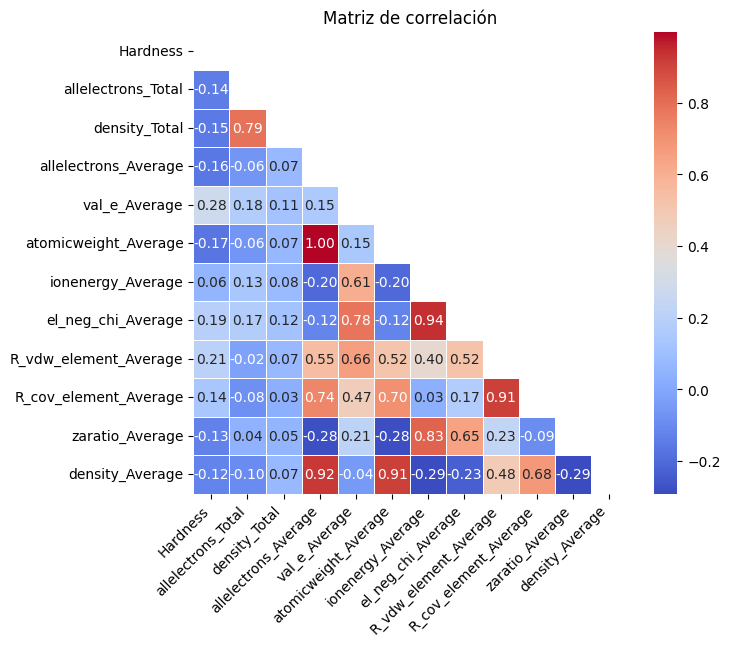

In [17]:
plt.figure(figsize=(7, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, mask=mask)
plt.xticks(rotation=45, ha='right')
plt.title("Matriz de correlación")
plt.show()

In [18]:
features_min.columns

Index(['Hardness', 'allelectrons_Total', 'density_Total',
       'allelectrons_Average', 'val_e_Average', 'atomicweight_Average',
       'ionenergy_Average', 'el_neg_chi_Average', 'R_vdw_element_Average',
       'R_cov_element_Average', 'zaratio_Average', 'density_Average'],
      dtype='object')

La visualización muestra una correlación perfecta entre ``allelectrons_Average`` y ``atomicweight_Average``. Además, se observan correlaciones superiores a 0.9 entre otras variables.

Se procederá a eliminar las correlaciones que superen 0.9. No se considerarán las demás para evitar eliminar un conjunto muy grande de variables. Se seguirán estudiando las demás mediante otros métodos.

In [19]:
features_min_del_col = features_min.drop(columns=["allelectrons_Average", "atomicweight_Average",
                                                  "ionenergy_Average", "R_vdw_element_Average"])

In [20]:
features_min_del_col.columns

Index(['Hardness', 'allelectrons_Total', 'density_Total', 'val_e_Average',
       'el_neg_chi_Average', 'R_cov_element_Average', 'zaratio_Average',
       'density_Average'],
      dtype='object')

### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X = features_min_del_col.drop(['Hardness'], axis=1)
y = features_min_del_col['Hardness']

rf_model = RandomForestRegressor()
rf_model.fit(X, y)

RandomForestRegressor()

In [ ]:
# Obtener la importancia de las características
feature_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
feature_importance_df

,Feature,Importance
2,val_e_Average,0.232563
4,R_cov_element_Average,0.197489
5,zaratio_Average,0.177146
6,density_Average,0.141317
3,el_neg_chi_Average,0.098388
0,allelectrons_Total,0.085652
1,density_Total,0.067446


Utilizamos Random Forest en su forma regresiva para analizar la importancia de las variables. Observamos que las variables con menor importancia entregadas por el modelo son: ``el_neg_chi_Average``, ``allelectrons_Total``, y ``density_Total``.

Si analizamos estas variables en la matriz de correlaciones, observamos que existe la posibilidad de una relación lineal entre ``allelectrons_Total`` y ``density_Total``, dado que su coeficiente de correlación es 0.79.

Antes de tomar una decisión de eliminar la variable ``density_Total``, utilizaremos el método AIC para validar esta idea.

### Akaike information criterion (AIC)

In [ ]:
import statsmodels.api as sm
import itertools

In [ ]:
X = features_min_del_col.drop(['Hardness'], axis=1)
y = features_min_del_col['Hardness']

In [ ]:
# Función para calcular el AIC
def calculate_aic(features):
    model = sm.OLS(y, sm.add_constant(X[features])).fit()
    aic = model.aic
    return aic

In [ ]:
all_features = X.columns.tolist()

best_features = None
best_aic = float('inf')

aic_results = {}

In [ ]:
# Bucle para seleccionar características
for i in range(1, len(all_features) + 1):
    # Combinaciones de características
    feature_combinations = itertools.combinations(all_features, i)

    for features in feature_combinations:
        current_aic = calculate_aic(list(features))

        # Almacenar el AIC para esta combinación de características
        aic_results[tuple(features)] = current_aic

        if current_aic < best_aic:
            best_aic = current_aic
            best_features = list(features)


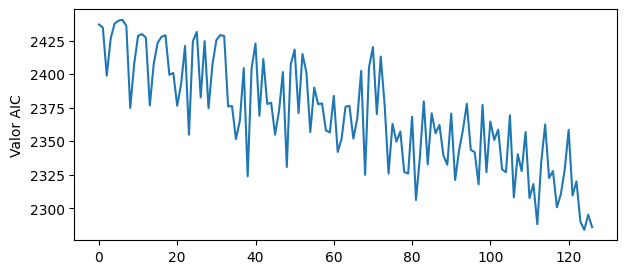

In [ ]:
ax  = pd.Series(aic_results.values()).plot(figsize=(7, 3))
ax.set_ylabel('Valor AIC')
plt.show()

In [ ]:
print("Cantidad de modelos evaluados: ", len(aic_results))
print("")
print("Mejores características:", best_features)
print("AIC correspondiente:", best_aic)

Cantidad de modelos evaluados:  127

Mejores características: ['allelectrons_Total', 'val_e_Average', 'el_neg_chi_Average', 'R_cov_element_Average', 'zaratio_Average', 'density_Average']
AIC correspondiente: 2284.0105745238798


Realizamos un análisis del criterio AIC en función de una regresión lineal. El resultado nos muestra que el modelo más efectivo bajo este criterio utiliza 6 variables, siendo ``density_Total`` la eliminada. Por lo tanto, este criterio refuerza la decisión de eliminar la variable de nuestras features predictoras.

## Clustering

Se busca clusterizar los datos del dataset ``Mineral_Dataset_Supplementary_Info`` en 4 grupos.

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_min)
scaled_df = pd.DataFrame(scaled_features, columns=features_min.columns)

In [22]:
X = scaled_df.drop(['Hardness'], axis=1)
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=1)
kmeans.fit(X)
labels = kmeans.labels_; labels

features_min_clustering = features_min
features_min_clustering['Cluster'] = labels
features_min_clustering['Cluster'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    501
2    109
1     10
3      2
Name: Cluster, dtype: int64

Se observa que los 4 clústeres construidos por K-means están desbalanceados en registros. Los observaremos graficamente utilizando PCA.  

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

resultados = pd.DataFrame(np.column_stack((X_pca, labels)))
resultados.columns = ["X", "Y", "Cluster"]

alt.Chart(resultados).mark_circle().encode(
    x = alt.X("X"),
    y = alt.Y("Y"),
    color = alt.Color("Cluster:N"),
)

alt.Chart(...)

Si bien estamos buscando 4 clústeres, solo visualizamos 2. Por otro lado, se observa un valor atípico en nuestro espacio de dimensiones creado por PCA.

In [25]:
out_cluster_1 = np.array(resultados[resultados.Y > 12].index)
features_min_clustering.iloc[out_cluster_1]

,Hardness,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Cluster
150,6.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
156,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
317,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
387,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
388,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
389,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
390,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
391,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
392,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
552,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


Encontramos que los valores atípicos son 10 registros con valores ceros en todas las características (excluyendo la variable objetivo Hardness). Serán eliminados del conjunto de datos. Además, posteriormente volveremos a utilizar K-means y PCA para analizar el resultado.

In [26]:
features_min_clustering = features_min_clustering.drop(out_cluster_1).reset_index(drop = True)

In [27]:
def kmns_pca(df):
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_features, columns=df.columns)

    X = scaled_df.drop(['Hardness', "Cluster"], axis=1)
    num_clusters = 4
    kmeans = KMeans(n_clusters=num_clusters, random_state=1)
    kmeans.fit(X)
    labels = kmeans.labels_; labels

    df_cluster = df
    df_cluster['Cluster'] = labels

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    X_pca_label = pd.DataFrame(np.column_stack((X_pca, labels)))
    X_pca_label.columns = ["X", "Y", "Cluster"]

    chart = alt.Chart(X_pca_label).mark_circle().encode(
        x = alt.X("X"),
        y = alt.Y("Y"),
        color = alt.Color("Cluster:N")
        )

    return (chart, df_cluster, X_pca_label)

Creamos una función que realice el proceso de K-means y PCA aplicado anteriormente, dado que este proceso podría ser algo iterativo.

### 2da Iteración

In [28]:
# 2da iteracion
chart, df_cluster, pca_label = kmns_pca(features_min_clustering)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [29]:
chart

alt.Chart(...)

Se volvio a aplicar un Kmeans luego de haber quitado los registros atipicos anteriores. Ademas, visualizamos el espacio de caracteristica, reducido por PCA, para analizar los cluster.

Observamos que ahora aparecen 3 cluster bien definidos a diferencia del anterior proceso donde solo vimos 2 cluster distinguibles. Tambien se observan que el cuarto cluster pareciera ser un grupo de valores atipicos. Se podria iterar otra vez para ver si logramos visualizar 4 cluster bien definidos.  

In [30]:
out_cluster_2 = np.array(pca_label[pca_label.Y > 8].index)
df_cluster.iloc[out_cluster_2]

,Hardness,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Cluster
38,1.8,15300.0,643.093804,9.592476,5.989969,19.195928,12.958928,3.264690,1.575699,0.720100,0.500405,0.403194,3
78,2.3,10116.0,502.575708,9.543396,5.781132,19.379077,12.976603,3.184434,1.577104,0.731830,0.497615,0.474128,3
366,2.3,9852.0,27.421875,7.977328,5.967611,15.953775,13.582798,3.426381,1.521587,0.641522,0.500783,0.022204,3


In [31]:
df_cluster = df_cluster.drop(out_cluster_2).reset_index(drop = True)

### 3ra Iteración

In [32]:
chart_v2, df_cluster_v2, pca_label_v2 = kmns_pca(df_cluster)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
chart_v2

alt.Chart(...)

In [34]:
out_cluster_3 = np.array(pca_label_v2[pca_label_v2.Y > 3.8].index)
df_cluster_v2.iloc[out_cluster_3]

,Hardness,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Cluster
60,4.8,1894.0,25.982136,8.417778,5.795556,16.839527,13.265820,3.321600,1.556178,0.680356,0.504142,0.115476,3
94,2.8,1196.0,51.811371,9.492063,5.809524,18.996993,12.815213,3.199762,1.580238,0.732381,0.507239,0.411201,3
306,3.2,1228.0,74.328372,9.746032,5.634921,19.789142,12.920761,3.139603,1.578333,0.733968,0.503851,0.589908,3
373,1.8,3328.0,4.489619,8.000000,5.951923,15.999172,13.569409,3.419904,1.522260,0.644038,0.502280,0.010792,3


In [35]:
df_cluster_v2 = df_cluster_v2.drop(out_cluster_3).reset_index(drop = True)

### 4ta Iteración

In [36]:
chart_v3, df_cluster_v3, pca_label_v3 = kmns_pca(df_cluster_v2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [37]:
chart_v3

alt.Chart(...)

In [44]:
df_cluster_v3.Cluster.value_counts()

0    276
2    135
3    114
1     80
Name: Cluster, dtype: int64

En esta cuarta iteración logramos vislumbrar cuatro clústeres bien definidos, habiendo eliminado 16 valores que nos generaban ruido a la hora de clusterizar con K-means.

### Clusters vs Hardness

Buscamos ver si existe diferenciación entre las distribuciones de la variable ``Hardness`` en los diferentes cluster.


In [58]:
df_cluster_v3.groupby("Cluster", as_index = True)["Hardness"].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,276.0,5.415217,1.488643,1.5,4.8,5.8,6.0,10.0
1,80.0,3.423750,1.412892,1.3,2.5,3.0,4.0,6.5
2,135.0,4.919259,1.429408,1.5,3.8,5.5,5.5,7.5
3,114.0,3.441228,1.478986,1.3,2.3,3.5,4.5,8.0


In [68]:
alt.Chart(df_cluster_v3).mark_boxplot().encode(
    x='Cluster:N',
    y='Hardness:Q'
).properties(
    width=400,
    height=300,
    title='Boxplot de Hardness por Cluster'
)

alt.Chart(...)

Por lo mostrado pareciera que entre las distribuciones de los cluster 1 y 3 bajo la variable Hardness, no es muy distinta si nos basamos en sus medias y medianas. Se observa que el intervalo intercuartil del cluster 3 es mayor y que su rango de valores es mayor al cluster 1. Los demas cluster parecieran diferenciarse de las distribuciones de los otros dos.

## Modelo de regresión

Se calibrara un modelo de regresion con el dataset ``Mineral_Dataset_Supplementary_Info`` para predecir la escala de dureza (``Hardness``).

Se toma en cuenta el conjunto de datos con la reducción de variables seleccionada anteriormente. Además, se eliminarán los 16 registros identificados como atípicos en la sección de clustering.

In [195]:
df_train = df_cluster_v3.drop(columns=["allelectrons_Average", "atomicweight_Average","ionenergy_Average", "R_vdw_element_Average",
                                        "density_Total", "Cluster"])

In [196]:
df_train.shape

(605, 7)

In [197]:
df_test = type_min.drop(["Unnamed: 0", "Formula", "Crystal structure", "allelectrons_Average", "atomicweight_Average",
                         "ionenergy_Average", "R_vdw_element_Average", "density_Total"], axis = 1)
df_test = df_test.rename({"Hardness (Mohs)": "Hardness"}, axis = 1)

In [198]:
df_test.shape

(52, 7)

### Regresión lineal

In [199]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [213]:
def plot_test_pred(y_test, y_pred):
  plt.scatter(range(len(y_test)), y_test, c='blue', label='Valores reales')
  plt.scatter(range(len(y_pred)), y_pred, c='red', label='Valores predichos')

  plt.xlabel('Indices')
  plt.ylabel('Valores')
  plt.title('Comparación entre valores verdaderos y predichos')
  plt.legend()

In [214]:
X_train = df_train.drop('Hardness', axis=1)
y_train = df_train['Hardness']

X_test = df_test.drop('Hardness', axis=1)
y_test = df_test['Hardness']

In [215]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [216]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [217]:
y_pred = model.predict(X_test_scaled)

In [218]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 78.60094063299985
R^2 Score: -33.53139368194624


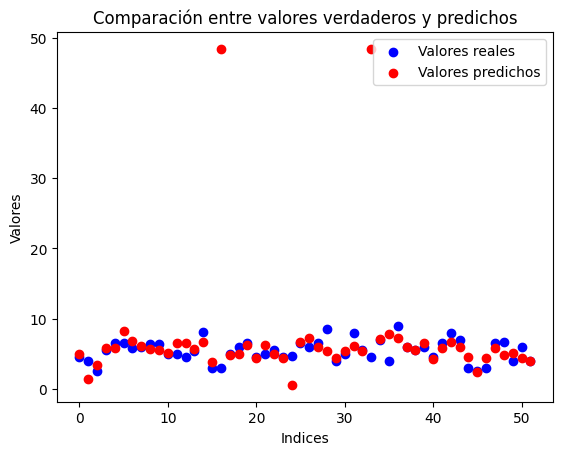

In [219]:
plot_test_pred(y_test, y_pred)

El rendimiento del modelo es bastante bajo, dado que el error es de un 78% y su R^2 es negativo.

Al visualizar los valores predichos versus los valores reales en test, se observa que la mayoria de los valores predichos se mueve en el espacio de los valores reales en test, pero existen dos valores que estan siendo muy mal estimados.  

In [220]:
df_test[y_pred > 40]

,Hardness,allelectrons_Total,val_e_Average,el_neg_chi_Average,R_cov_element_Average,zaratio_Average,density_Average
16,3.0,0.0,0.0,0.0,0.0,0.0,0.0
33,4.5,0.0,0.0,0.0,0.0,0.0,0.0


Vemos que en nuestro datos de test tenemos valores en cero. Haremos la validacion sin considerarlos.

In [221]:
df_test2 = df_test[y_pred < 40]
df_test2.shape

(50, 7)

In [222]:
X_test = df_test2.drop('Hardness', axis=1)
y_test = df_test2['Hardness']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 1.8500457947994497
R^2 Score: 0.16842868754026952


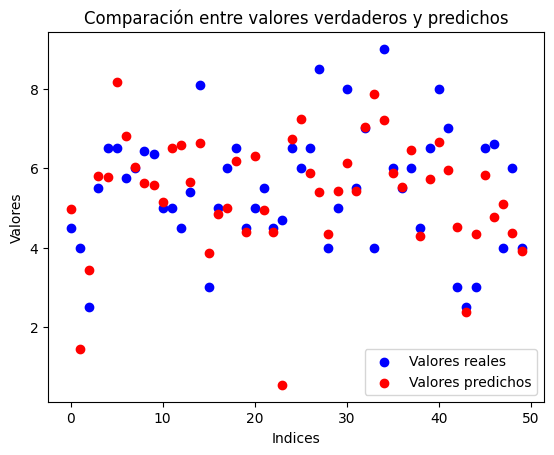

In [223]:
plot_test_pred(y_test, y_pred)

In [225]:
y_test.describe()

count    50.000000
mean      5.516400
std       1.506706
min       2.500000
25%       4.500000
50%       5.500000
75%       6.500000
max       9.000000
Name: Hardness, dtype: float64

Después de eliminar los valores atípicos del conjunto de datos de prueba, observamos un notable aumento en el rendimiento del modelo en comparación con la versión anterior.

El error cuadrático medio (MSE) revela que nuestras predicciones tienen, en promedio, una desviación de 1.85 unidades. Esta cifra es significativa considerando que nuestra escala de valores se sitúa en el rango de [2.5 - 9]. Por otro lado, el coeficiente de determinación (R^2) indica que nuestro modelo solo explica el 16% de la varianza de los datos, lo cual es relativamente bajo. Por lo tanto, aunque hemos mejorado el rendimiento, el modelo aún no alcanza un nivel aceptable.  Se contempla la posibilidad de explorar otros modelos de regresión, como Regresiones Lasso/Ridge, Polinomiales, Regresiones por Random Forest o XGBoost, entre otros, con el objetivo de mejorar los resultados actuales.